[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/3-Intro-Vision/3-04-Detectores-Descriptores.ipynb)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import sys

# 1. Detectores 

In [4]:
# Imagen de entrada
I = cv2.imread('images/jirafa.png')
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Forzar a float dado que harris necesita valores grandes
Igray = np.float32(Igray)

## 1.1. Detector de esquinas ("corners") de Harris

Más información se puede encontrar [aquí](https://docs.opencv.org/4.8.0/dc/d0d/tutorial_py_features_harris.html)


In [5]:
nsize = 2    # Tamaño del vecindario (neighborhood)
ksize = 3    # Tamaño del Kernel (para el filtro de Sobel)
k = 0.06     # Valor de k en Harris

# Detector de Harris
Iharris = cv2.cornerHarris(Igray, nsize, ksize, k)

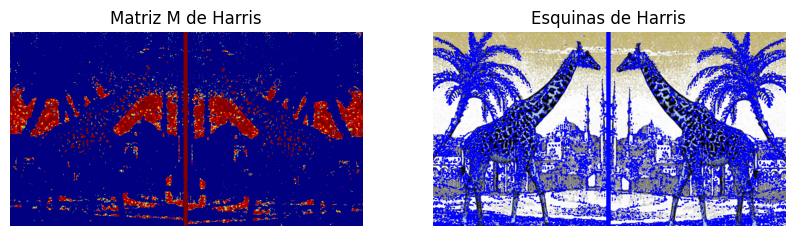

In [6]:
# Dilatar el resultado solo para observar mejor las esquinas (corners)
Iharris_dil = cv2.dilate(Iharris, None)
# Cambiar el mapa de color solo para mostrar
Iharrish = cv2.applyColorMap(cv2.convertScaleAbs(Iharris_dil), cv2.COLORMAP_JET)

# Mostrar las esquinas (corners) si son mayores a th*max (como rojo)
th = 0.01
I[Iharris_dil > th*Iharris_dil.max()] = [0, 0, 255]

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Iharrish, cmap='gray'); plt.title('Matriz M de Harris'); plt.axis('off')
plt.subplot(122)
plt.imshow(I, cmap='gray'); plt.title('Esquinas de Harris'); plt.axis('off')
plt.show()

## 1.2. Detector de Shi-Tomasi

Más información se puede encontrar [aquí](https://docs.opencv.org/4.8.0/d4/d8c/tutorial_py_shi_tomasi.html)

In [7]:
I = cv2.imread('./images/blocks.png')

Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
Igray = np.float32(Igray)

In [10]:
numcorners = 100  # Mejores esquinas a mantener
quality = 0.01   # Debajo de este valor se rechaza
mindist = 10     # Mínima distancia euclideana entre esquinas

# Detector (llamado en OpenCV good features to track)
Icorners = cv2.goodFeaturesToTrack(Igray, numcorners, quality, mindist)
Icorners = np.intp(Icorners)

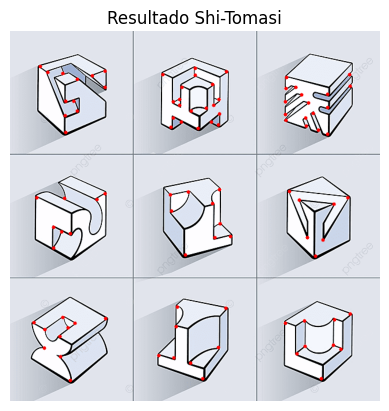

In [11]:
for i in Icorners:
    x,y = i.ravel()
    cv2.circle(I, (x,y), 3, 255, -1)

plt.imshow(I, cmap='gray')
plt.title('Resultado Shi-Tomasi')
plt.axis('off'); plt.show()

## 1.3. Detector FAST

FAST significa "Features from Accelerated Segment Test". Más información se puede encontrar [aquí](https://docs.opencv.org/4.8.0/df/d0c/tutorial_py_fast.html)


In [12]:
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Iniciar del detector FAST con valores por defecto
fast = cv2.FastFeatureDetector_create()

# "Keypoints" usando FAST
keypts = fast.detect(Igray, None)

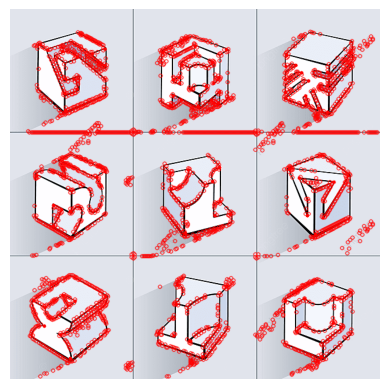

In [13]:
# Dibujar y mostrar los keypoints en la imagen
Ifast = I.copy()
cv2.drawKeypoints(I, keypts, Ifast, color=(255,0,0))

plt.imshow(Ifast)
plt.axis('off'); plt.show()

In [14]:
# Mostrar los parámetros por defecto
print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Keypoints con supresión de no máximos: ", len(keypts))

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Keypoints con supresión de no máximos:  2773


**Detección sin supresión de no máximos (non-max suppression)**

In [15]:
# Quitar la supresión de no máximos
fast.setNonmaxSuppression(0)
# Realizar la detección
keypts2 = fast.detect(Igray, None)

Keypoints sin supresión de no máximos:  8860


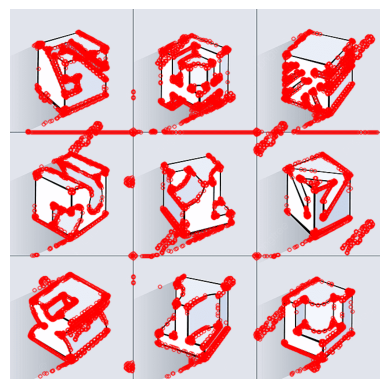

In [16]:
print("Keypoints sin supresión de no máximos: ", len(keypts2))

Ifast2 = I.copy()
cv2.drawKeypoints(I, keypts2, Ifast2, color=(255,0,0))

plt.imshow(Ifast2)
plt.axis('off'); plt.show()

# 2.&nbsp;Descriptores

In [19]:
I = cv2.imread('images/blocks.png')
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

## 2.1. SIFT

SIFT significa "Scale-Invariant Feature Transform". Se puede obtener más información [aquí](https://docs.opencv.org/4.8.0/da/df5/tutorial_py_sift_intro.html).

In [20]:
# Inicializar un descriptor SIFT
sift = cv2.SIFT_create()

# Obtener puntos característicos
keypts = sift.detect(Igray, None)

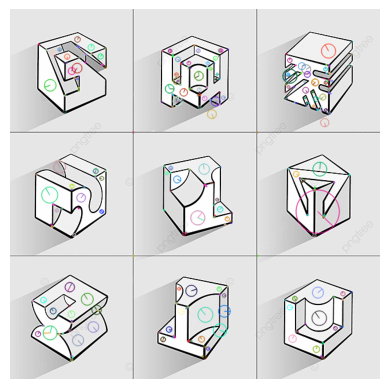

In [21]:
# Dibujar los keypoints sobre la imagen
Isift = I.copy()
cv2.drawKeypoints(Igray, keypts, Isift, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(Isift)
plt.axis('off'); plt.show()

In [22]:
# Cálculo de los descriptores a partir de los keypoints calculados
out = sift.compute(Igray,keypts)

keypoints = out[0]
descriptores = out[1]

print("Cantidad de keypoints:", len(keypoints))
print("Cantidad de descriptores:", len(descriptores))
print("Tamaño de cada descriptor:", descriptores[0].shape)

Cantidad de keypoints: 407
Cantidad de descriptores: 407
Tamaño de cada descriptor: (128,)


In [23]:
# Ejemplo de valor de un descriptor
descriptores[0]

array([  1.,  94.,  43.,   0.,   1.,  80.,  34.,   1.,   0., 122.,  49.,
         1.,   1.,  10.,   5.,   0.,   1.,  42.,   8.,   0.,   0.,   1.,
         0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         7.,  51.,  60.,  24., 122.,  48.,   0.,  20., 122.,  51.,  62.,
        97.,  72.,  11.,   1., 117., 122.,  14.,   4.,   5.,   1.,   0.,
         3.,   8.,   6.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
       120.,  89.,   8.,   7.,  92.,  54.,  42.,   8.,  18.,  58.,  86.,
       107.,  85.,  34., 122.,  23.,   1.,   2.,  11.,  17.,   7.,  60.,
        17.,   2.,   1.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   1.,
         4.,  21.,   4.,  93.,  59.,  41.,   0.,   0.,  29., 122.,  33.,
        31.,  20., 122.,   0.,   0.,   3.,  19.,   4.,   1.,  41.,   5.,
         1.,   1.,   2.,   0.,   0.,   0.,   1.], dtype=float32)

**NOTA**: La función anterior `compute` asume que se obtuvo los keypoints usando `detect`. Alternativamente, se puede obtener los descriptores y keypoints a la vez usando la función `detectAndCompute`.

In [24]:
keypts, descriptors = sift.detectAndCompute(Igray, None)

print("Cantidad de descriptores:", len(descriptors))

Cantidad de descriptores: 407


## 2.2. ORB

ORB significa Oriented FAST and Rotated BRIEF
Más información en la [documentación](https://docs.opencv.org/4.8.0/db/d95/classcv_1_1ORB.html) y en este [tutorial](https://docs.opencv.org/4.8.0/d1/d89/tutorial_py_orb.html).

In [25]:
# Inicializar detector ORB
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)

# "Keypoints" y descriptores con ORB
keypts, descript_orb = orb.detectAndCompute(I, None)

# La instrucción anterior se podría separar en 2 pasos
if (False):
    keypts = orb.detect(I, None)
    keypts, descript_orb = orb.compute(I, keypts)

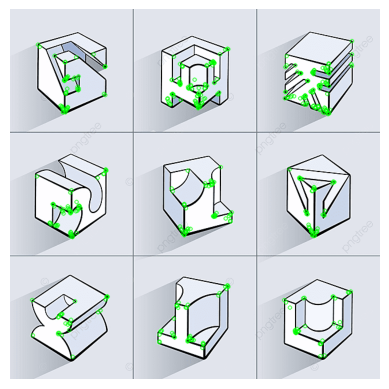

In [26]:
# Dibujar los "keypoints" (sin incluir tamaño ni orientación)
Iorb = I.copy()
cv2.drawKeypoints(I, keypts, Iorb, color=(0,255,0), flags=0)

plt.imshow(Iorb)
plt.axis('off'); plt.show()

## 2.3. Descriptor BRIEF con detector STAR

* BRIEF (Binary Robust Independent Elementary Features)
* STAR (STAR Detector, llamado CenSurE: Center Surround Extremas)

Mayor detalle sobre el funcionamiento se puede encontrar [aquí](https://docs.opencv.org/4.8.0/dc/d7d/tutorial_py_brief.html).

In [27]:
# Inicializar el detector STAR
star = cv2.xfeatures2d.StarDetector_create()
# Inicializar el descriptor BRIEF
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Encontrar "keypoints" usando STAR (CenSurE)
keypts = star.detect(I, None)
# Calcular los descriptores usando BRIEF
keypts, descript_brief = brief.compute(I, keypts)

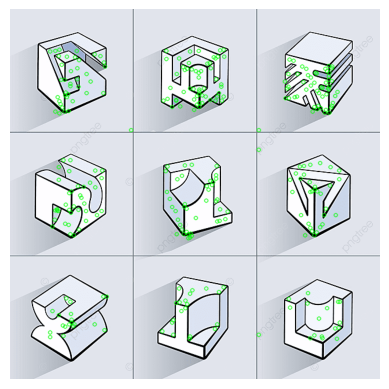

In [28]:
# Dibuja los "keypoints" (sin incluir tamaño ni orientación)
Ibrief = I.copy()
cv2.drawKeypoints(I, keypts, Ibrief, color=(0,255,0), flags=0)

plt.imshow(Ibrief)
plt.axis('off'); plt.show()

## 2.4 BRISK con detector FAST

* FAST (Features from Accelerated Segment Test)
* BRISK (Binary Robust Invariant Scalable Keypoints)

In [29]:
# Iniciar del detector FAST con valores por defecto
fast = cv2.FastFeatureDetector_create()

# "Keypoints" usando FAST
keypts = fast.detect(Igray, None)

# Descriptores usando BRISK (a partir de puntos dados por FAST)
br = cv2.BRISK_create();
keypts, descript_brisk = br.compute(I, keypts)

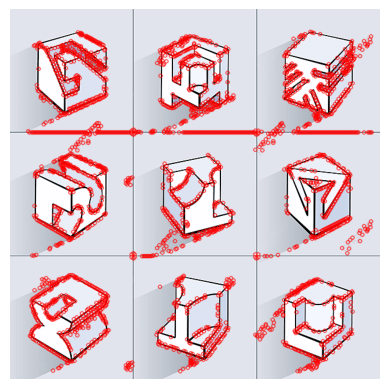

In [30]:
# Dibujar y mostrar los keypoints en la imagen
Ifast = I.copy()
cv2.drawKeypoints(I, keypts, Ifast, color=(255,0,0))

plt.imshow(Ifast)
plt.axis('off'); plt.show()

## 2.5. SURF

SURF significa "Speeded-Up Robust Features". Más información se puede encontrar [aquí](https://docs.opencv.org/4.8.0/df/dd2/tutorial_py_surf_intro.html).

Nota: SURF tiene patentes vigentes, por lo que solo se puede utilizar con el paquete `opencv-contrib-python-nonfree` seleccionando la opción `OPENCV_ENABLE_NONFREE` al momento de compilar. En Google Colab no estará disponible.

In [31]:
use_surf = False
if (use_surf):
    hessian_threshold = 4000

    # Inicialización de SURF
    surf = cv2.xfeatures2d.SURF_create(hessian_threshold)
    # Obtención de descriptores y keypoints
    keypoints, descriptors = surf.detectAndCompute(Igray, None)

    Isurf = I.copy()
    cv2.drawKeypoints(Igray, keypoints, Isurf, (255,0,0), 4)

    plt.imshow(Isurf)
    plt.axis('off'); plt.show()

# 3.&nbsp;HoG

HoG = "Histogram of Gradients"

In [33]:
from skimage.feature import hog
from skimage import exposure

In [35]:
I = cv2.imread('images/pelado.png')

# Convertir de BGR en RGB
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# descr_hog: descriptor de HoG
# Ihog: Imagen con características de HoG
descr_hog, Ihog = hog(I, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), visualize=True, channel_axis=-1)

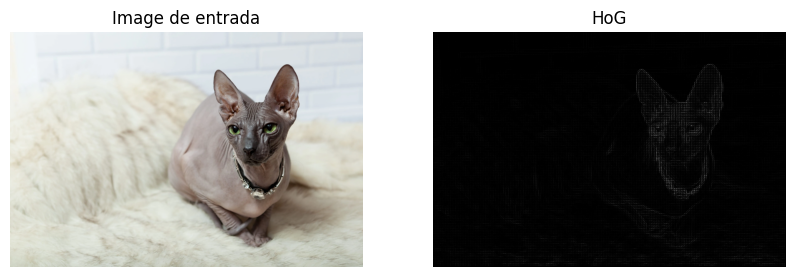

In [36]:
# Mejorar el nivel de gris para mostrar la imagen
Ihog = exposure.rescale_intensity(Ihog, in_range=(0, 10))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1); plt.imshow(I, cmap='gray')
plt.title('Image de entrada'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(Ihog, cmap='gray')
plt.title('HoG'); plt.axis('off')
plt.show()

In [3]:
# Verificar disponibilidad de módulos contrib y no-free
use_xfeatures = hasattr(cv2, 'xfeatures2d')
if not use_xfeatures:
    print("[WARNING] Módulo xfeatures2d no disponible: SIFT, SURF, STAR y BRIEF no funcionarán.")

# Inicializar detectores y descriptores estándar
fast_detector = cv2.FastFeatureDetector_create()
brisk = cv2.BRISK_create()
orb = cv2.ORB_create(500)
sift = cv2.SIFT_create() if hasattr(cv2, 'SIFT_create') else None

# Inicializar contrib/"non-free" features
brief_extractor = None
star_detector = None
surf = None
if use_xfeatures:
    try:
        brief_extractor = cv2.xfeatures2d.BriefDescriptorExtractor_create()
        star_detector = cv2.xfeatures2d.StarDetector_create()
    except Exception:
        brief_extractor = None
        star_detector = None
    try:
        surf = cv2.xfeatures2d.SURF_create(400)
    except Exception:
        surf = None

# HOG para detección de personas
detector_hog = cv2.HOGDescriptor()
detector_hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Función utilitaria para convertir a gris
def to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Definición de funciones de detección/descriptores

def detect_harris(img, _):
    gray = to_gray(img)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    out = img.copy()
    out[dst > 0.01 * dst.max()] = [0, 0, 255]
    return out


def detect_shitomasi(img, k):
    gray = to_gray(img)
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=k, qualityLevel=0.01, minDistance=10)
    out = img.copy()
    if corners is not None:
        pts = corners.reshape(-1, 2).astype(int)
        for x, y in pts:
            cv2.circle(out, (x, y), 3, (255, 0, 0), -1)
    return out


def detect_fast(img, _):
    kp = fast_detector.detect(to_gray(img), None)
    return cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)


def detect_star_brief(img, _):
    if star_detector is None or brief_extractor is None:
        return img
    kp = star_detector.detect(to_gray(img), None)
    kp, _ = brief_extractor.compute(to_gray(img), kp)
    return cv2.drawKeypoints(img, kp, None, color=(0, 255, 255), flags=0)


def detect_brisk(img, _):
    kp, _ = brisk.detectAndCompute(to_gray(img), None)
    return cv2.drawKeypoints(img, kp, None, color=(255, 0, 255), flags=0)


def detect_orb(img, k):
    orb.setMaxFeatures(k)
    kp, _ = orb.detectAndCompute(to_gray(img), None)
    return cv2.drawKeypoints(img, kp, None, color=(255, 255, 0), flags=0)


def detect_sift(img, _):
    if sift is None:
        return img
    gray = to_gray(img)
    keypts = sift.detect(gray, None)
    out = img.copy()
    cv2.drawKeypoints(gray, keypts, out, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return out


def detect_surf(img, _):
    if surf is None:
        return img
    kp, _ = surf.detectAndCompute(to_gray(img), None)
    return cv2.drawKeypoints(img, kp, None, color=(255, 128, 0), flags=0)


def detect_hog(img, _):
    # Ajuste de parámetros para mejor detección
    rects, weights = detector_hog.detectMultiScale(img,
        winStride=(8, 8), padding=(8, 8), scale=1.05)
    out = img.copy()
    for (x, y, w, h) in rects:
        cv2.rectangle(out, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return out

# Construir mapeo de teclas según disponibilidad
actions = {
    'h': detect_harris,
    't': detect_shitomasi,
    'f': detect_fast,
    'i': detect_brisk,
    'o': detect_orb,
    's': detect_sift,
    'g': detect_hog
}
if star_detector is not None and brief_extractor is not None:
    actions['b'] = detect_star_brief
if surf is not None:
    actions['u'] = detect_surf

# Construir menú dinámico
menu = ['h=Harris', 't=Shi-Tomasi', 'f=FAST', 'i=BRISK', 'o=ORB', 's=SIFT', 'g=HOG']
if 'b' in actions:
    menu.insert(3, 'b=STAR+BRIEF')
if 'u' in actions:
    menu.append('u=SURF')

active = 'h'
k = 100
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    sys.exit("[ERROR] No se pudo abrir la cámara")

print(f"Teclas: {', '.join(menu)}")
print("←/→ para variar k (min=10), q para salir")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    out = actions.get(active, detect_harris)(frame, k)
    cv2.putText(out, f"{active.upper()} k={k}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2.imshow("Detectores & Descriptores", out)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key in (81, 2424832):
        k = max(10, k - 10)
    elif key in (83, 2555904):
        k += 10
    else:
        c = chr(key)
        if c in actions:
            active = c

cap.release()
cv2.destroyAllWindows()

Teclas: h=Harris, t=Shi-Tomasi, f=FAST, b=STAR+BRIEF, i=BRISK, o=ORB, s=SIFT, g=HOG
←/→ para variar k (min=10), q para salir
